In [203]:
library(readr) # for importing the datafile
library(afex) # for the anova
library(tidyverse) # for restructuring it
library(rstatix) # for testing assumptions
library(ggpubr) # for graphical test of normality
library(emmeans) # for post-hoc tests


In [204]:
d_long <- read.csv("eda/eda_long_new_kombiniert.csv", sep=",")
names(d_long)[names(d_long) == "puls"] <- "pulse"
d_long


prob_nr,time_point,eda,age,sex,group,phase,trial_type,condition,repetition,run
<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>
9,0,1.86e-05,30,M,Sound,-1,pause,pause,0,1
15,0,5.7000000000000005e-06,23,F,Sound,-1,pause,pause,0,1
28,0,9.800000000000001e-06,24,F,Musik,-1,pause,pause,0,1
20,0,8.8e-06,22,F,Sound,-1,pause,pause,0,1
24,0,3.6000000000000003e-06,25,M,Musik,-1,pause,pause,0,1
12,0,7.1e-06,21,F,Sound,-1,pause,pause,0,1
14,0,1.74e-05,23,F,Musik,-1,pause,pause,0,1
19,0,2.8800000000000002e-05,24,M,Musik,-1,pause,pause,0,1
3,0,1.98e-05,23,M,Musik,-1,pause,pause,0,1


In [205]:
d_long$type <- as.factor(d_long$trial_type)
d_long$condition <- as.factor(d_long$condition)
d_long$group <- as.factor(d_long$group)
d_long$sex <- as.factor(d_long$sex)
d_long$eda <- as.numeric(d_long$eda)
d_long$time<- as.factor(paste(d_long$run, d_long$repetition, sep = "_"))

# bad data structure. See what happens if I eliminate all rows that are "pause" in "condition"

d_long_new <- d_long[d_long$condition != "pause", ] 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [206]:
#round(eda)
#apply(is.na(d_long_new), 2, which)

In [217]:
which(is.na(d_long_new), arr.ind = TRUE)
d_long_new = na.omit(d_long_new)

,row,col
156,25,1
157,26,3
164,33,3
230,99,3
238,107,3
256,125,3
285,154,3
299,168,3
323,192,3
340,209,3


In [218]:
summary(d_long_new)

    prob_nr        time_point         eda                 age        sex      
 Min.   : 2.00   Min.   :  6.0   Min.   :2.100e-06   Min.   :21.00   F: 9213  
 1st Qu.:12.00   1st Qu.:182.0   1st Qu.:7.800e-06   1st Qu.:23.00   M:11118  
 Median :17.00   Median :329.0   Median :1.550e-05   Median :23.00            
 Mean   :17.23   Mean   :344.2   Mean   :1.693e-05   Mean   :23.92            
 3rd Qu.:24.00   3rd Qu.:535.0   3rd Qu.:1.970e-05   3rd Qu.:25.00            
 Max.   :29.00   Max.   :681.0   Max.   :7.220e-05   Max.   :30.00            
   group           phase        trial_type         condition    
 Musik:11882   Min.   :0.000   Length:20331       pause :    0  
 Sound: 8449   1st Qu.:2.000   Class :character   relax :10165  
               Median :3.000   Mode  :character   stress:10166  
               Mean   :3.509                                    
               3rd Qu.:6.000                                    
               Max.   :7.000                             

In [191]:
# our four factors are:
# music vs sound (d_long$group, btw)
# stress vs relaxation (d_long$type, wth)
# maths vs rotation (d_long$condition, wth)
# run + repetition within run (d_long$time, wth)
# 
# covariates are:
# age (d_long$age, btw)
# gender (d_long$sex, btw)

Test assumptions

In [219]:
# 1) normality

d_long_new %>%
  group_by(time, type, condition, group) %>%
  shapiro_test(eda)

d_long_new %>%
  group_by(time, type, condition, group) %>%
  summary()

group,condition,type,time,variable,statistic,p
<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
Musik,relax,math,1_1,eda,0.7545841,1.497510e-31
Sound,relax,math,1_1,eda,0.8362742,4.730985e-23
Musik,stress,math,1_1,eda,0.7772391,1.346264e-30
Sound,stress,math,1_1,eda,0.9083926,2.089074e-17
Musik,relax,rotation,1_1,eda,0.7598363,1.178780e-31
Sound,relax,rotation,1_1,eda,0.8656462,1.524941e-20
Musik,stress,rotation,1_1,eda,0.7687465,5.082465e-31
Sound,stress,rotation,1_1,eda,0.8704858,8.383085e-21
Musik,relax,math,1_2,eda,0.7544967,6.260891e-32


    prob_nr        time_point         eda                 age        sex      
 Min.   : 2.00   Min.   :  6.0   Min.   :2.100e-06   Min.   :21.00   F: 9213  
 1st Qu.:12.00   1st Qu.:182.0   1st Qu.:7.800e-06   1st Qu.:23.00   M:11118  
 Median :17.00   Median :329.0   Median :1.550e-05   Median :23.00            
 Mean   :17.23   Mean   :344.2   Mean   :1.693e-05   Mean   :23.92            
 3rd Qu.:24.00   3rd Qu.:535.0   3rd Qu.:1.970e-05   3rd Qu.:25.00            
 Max.   :29.00   Max.   :681.0   Max.   :7.220e-05   Max.   :30.00            
   group           phase        trial_type         condition    
 Musik:11882   Min.   :0.000   Length:20331       pause :    0  
 Sound: 8449   1st Qu.:2.000   Class :character   relax :10165  
               Median :3.000   Mode  :character   stress:10166  
               Mean   :3.509                                    
               3rd Qu.:6.000                                    
               Max.   :7.000                             

In [193]:
ggqqplot(d_long_new[group = "Musik"], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)


ggqqplot(d_long_new[group = 'Musik'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Musikbedingung') +
  facet_grid(time ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ type)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(condition ~ group)

ggqqplot(d_long_new[group = 'Sound'], "eda", ggtheme = theme_bw(),
         title = 'Probanden in Soundbedingung') +
  facet_grid(time ~ group)

# qqplots show that distribution is mostly OK

ERROR: Error in `[.data.frame`(d_long_new, group = "Musik"): unused argument (group = "Musik")


In [209]:
# Installing
#install.packages("readr")
# Loading
#library("readr")

In [220]:
# 2) homogeneity of variance (only for between-subject factors)

d_long %>%
  group_by(run, phase) %>%
  levene_test(eda ~ group)
# not given, we need to correct the results.

phase,run,df1,df2,statistic,p
<int>,<int>,<int>,<int>,<dbl>,<dbl>
-1,1,1,5251,399.58648,9.768483e-86
0,1,1,1261,87.12329,4.444200e-20
1,1,1,1265,107.58460,3.009714e-24
2,1,1,1282,108.67826,1.759882e-24
3,1,1,1276,111.61639,4.541908e-25
4,1,1,1229,109.13727,1.557490e-24
5,1,1,1271,93.39425,2.279136e-21
6,1,1,1277,84.98670,1.201497e-19
7,1,1,1289,98.09217,2.447810e-22


In [ ]:
# 3) assumption of sphericity (only for within-subject factors)

# will be checked and corrected for automatically when computing the ANOVA. Look at that then.

Define model 

In [221]:
model1 <- aov_ez("prob_nr", # Variable/column defining your participants
       "eda", # dv
       d_long, # name of your dataframe
       between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
       within = c("time", "condition", "type"), 
       include_aov = TRUE)


model1
summary(model1)

ERROR: Error: Empty cells in within-subjects design  (i.e., bad data structure).
table(data[c("time", "condition", "type")])
# , , type = math
# 
#       condition
# time   pause relax stress
#   X1_0     0     0      0
#   X1_1     0  1320   1320
#   X1_2     0  1298   1320
#   X2_0     0     0      0
#   X2_1     0  1320   1320
#   X2_2     0  1320   1298
# 
# , , type = pause
# 
#       condition
# time   pause relax stress
#   X1_0  5396     0      0
#   X1_1     0     0      0
#   X1_2     0     0      0
#   X2_0  5397     0      0
#   X2_1     0     0      0
#   X2_2     0     0      0
# 
# , , type = rotation
# 
#       condition
# time   pause relax stress
#   X1_0     0     0      0
#   X1_1     0  1298   1342
#   X1_2     0  1298   1320
#   X2_0     0     0      0
#   X2_1     0  1342   1298
#   X2_2     0  1320   1298
# 


In [222]:
# with pause excluded

model1 <- aov_ez("prob_nr", # Variable/column defining your participants
                 "eda", # dv
                 d_long_new, # name of your dataframe
                 between = c("group", "sex"), # if sex was also included, this would be c('group', 'sex')
                 within = c("time", "condition", "type"), 
                 include_aov = TRUE, na.rm=TRUE)
model1
summary(model1)


# we see that the assumption of sphericity was corrected for using the Greenhouse-Geisser correction
# we also see that we have an effect for time
# and for time*condition*type

Warning message:
“More than one observation per cell, aggregating the data using mean (i.e, fun_aggregate = mean)!”
Contrasts set to contr.sum for the following variables: group, sex



Anova Table (Type 3 tests)

Response: eda
                          Effect    df  MSE        F   ges p.value
1                          group 1, 18 0.00     0.28  .015    .601
2                            sex 1, 18 0.00     2.30  .112    .147
3                      group:sex 1, 18 0.00     0.16  .009    .693
4                           time 3, 54 0.00   3.59 * <.001    .019
5                     group:time 3, 54 0.00     2.06 <.001    .117
6                       sex:time 3, 54 0.00     0.04 <.001    .990
7                 group:sex:time 3, 54 0.00     0.78 <.001    .508
8                      condition 1, 18 0.00     1.97 <.001    .177
9                group:condition 1, 18 0.00     1.97 <.001    .177
10                 sex:condition 1, 18 0.00     1.97 <.001    .177
11           group:sex:condition 1, 18 0.00     1.97 <.001    .177
12                          type 1, 18 0.00     0.75 <.001    .399
13                    group:type 1, 18 0.00     0.49 <.001    .493
14                  

Warning message in summary.Anova.mlm(object$Anova, multivariate = FALSE):
“Singular error SSP matrix:
non-sphericity test and corrections not available”



Univariate Type III Repeated-Measures ANOVA Assuming Sphericity

                                 Sum Sq num Df Error SS den Df F value
(Intercept)                   8.626e-08      1 5.69e-08     18 27.2879
group                         8.980e-10      1 5.69e-08     18  0.2840
sex                           7.259e-09      1 5.69e-08     18  2.2964
group:sex                     5.110e-10      1 5.69e-08     18  0.1615
time                          4.700e-11      3 2.34e-10     54  3.5914
group:time                    2.700e-11      3 2.34e-10     54  2.0558
sex:time                      1.000e-12      3 2.34e-10     54  0.0391
group:sex:time                1.000e-11      3 2.34e-10     54  0.7841
condition                     0.000e+00      1 0.00e+00     18  1.9749
group:condition               0.000e+00      1 0.00e+00     18  1.9749
sex:condition                 0.000e+00      1 0.00e+00     18  1.9749
group:sex:condition           0.000e+00      1 0.00e+00     18  1.9749
type       

# post hoc tests:

In [196]:
m1_ph <- emmeans(model1, "time") # defining here which variables plus their interaction I would like to include in my posthoc-Tests
m1_ph
pairs(m1_ph) # gives you a massive table with all pair comparisons between the two significant factors, with p-values already corrected for multiple testing

# to combine pairs of factor levels define contrasts:
# e.g. test phases -1 to 3 against phases 4 to 7, but define that for each of the runs

 time   emmean       SE df lower.CL upper.CL
 X1_1 1.64e-05 3.15e-06 18 9.75e-06 2.30e-05
 X1_2 1.56e-05 2.98e-06 18 9.36e-06 2.19e-05
 X2_1 1.64e-05 3.15e-06 18 9.75e-06 2.30e-05
 X2_2 1.56e-05 2.98e-06 18 9.36e-06 2.19e-05

Results are averaged over the levels of: group, sex, type, condition 
Confidence level used: 0.95 

 contrast     estimate       SE df t.ratio p.value
 X1_1 - X1_2  7.45e-07 3.93e-07 18   1.895  0.2648
 X1_1 - X2_1 -5.70e-12 4.00e-12 18  -1.405  0.5122
 X1_1 - X2_2  7.45e-07 3.93e-07 18   1.895  0.2648
 X1_2 - X2_1 -7.45e-07 3.93e-07 18  -1.895  0.2648
 X1_2 - X2_2  0.00e+00 0.00e+00 18     NaN     NaN
 X2_1 - X2_2  7.45e-07 3.93e-07 18   1.895  0.2648

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: tukey method for comparing a family of 4 estimates 

In [268]:
c1 <- list(run1vsrun2 = c(1, 1, -1, -1), 
           runwdh = c(1, -1, 1, -1)
        # this vector gives each line in the object 'm1_ph' a weight
          )

# if several contrasts are defined, these go into a list of vectors and each get their own name.
  
contrast(m1_ph, c1, adjust = "holm") # here we define how to adjust the alpha-level, specified here is the Bonferroni-Holm correction, 
                                     # which is less strict than the Bonferroni correction

# and we see: there is a difference, t(20) = 3.222, p = 0.0043

 contrast    estimate       SE df t.ratio p.value
 run1vsrun2 -5.70e-12 4.00e-12 18  -1.405  0.1769
 runwdh      1.49e-06 7.86e-07 18   1.895  0.1485

Results are averaged over the levels of: group, sex, type, condition 
P value adjustment: holm method for 2 tests 

plots

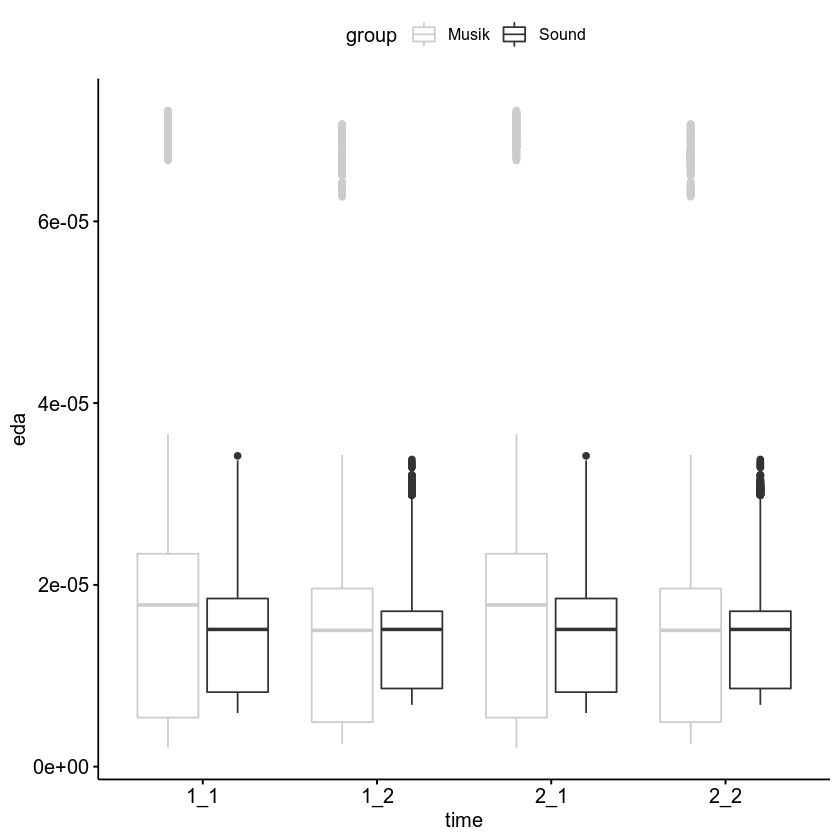

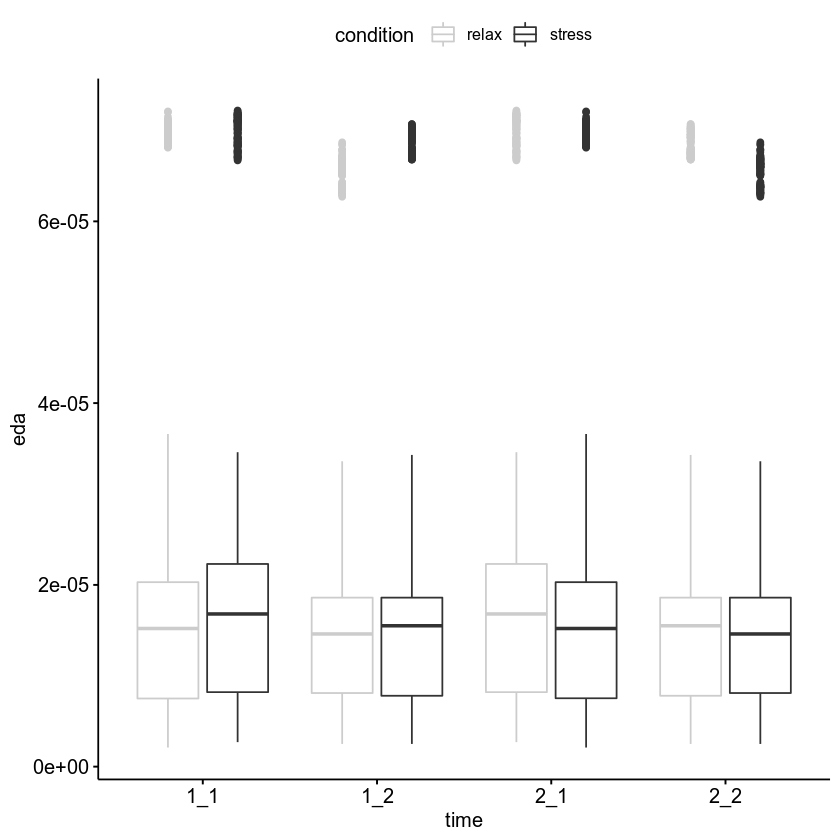

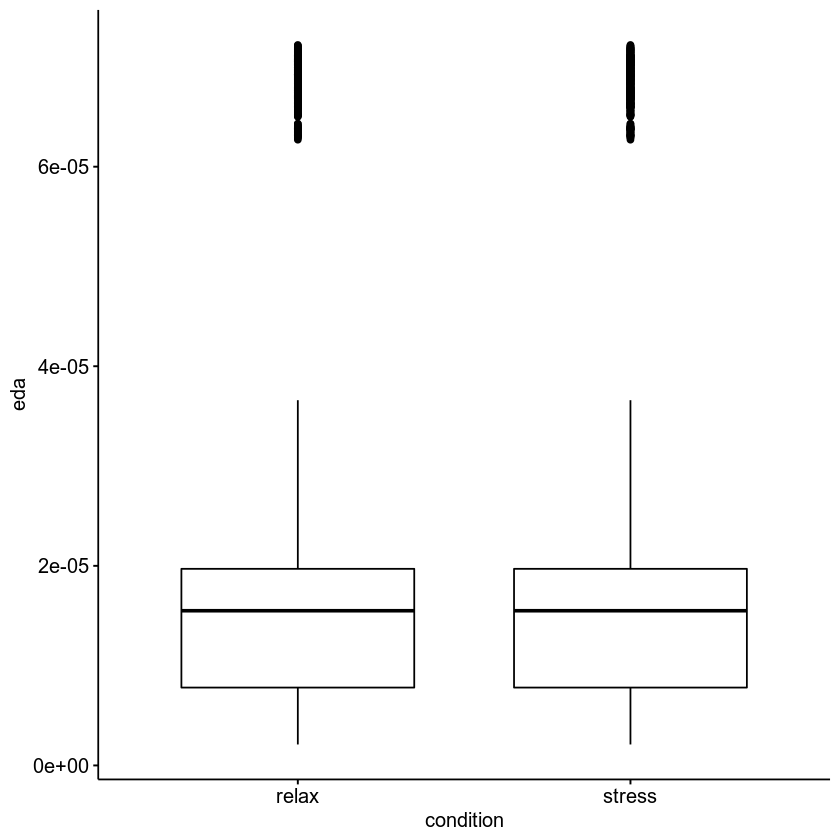

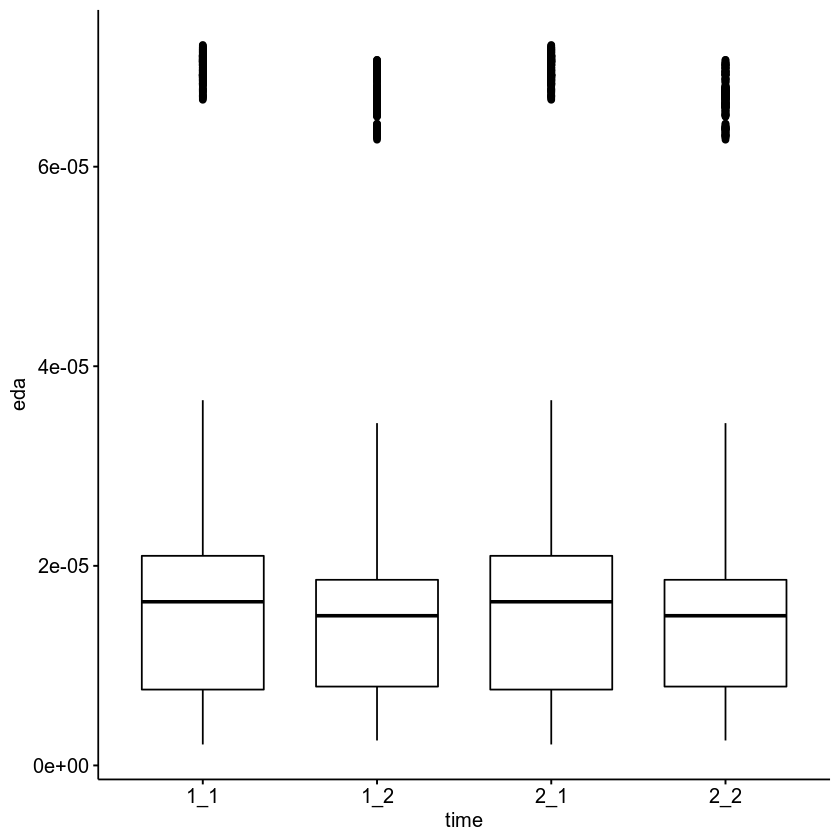

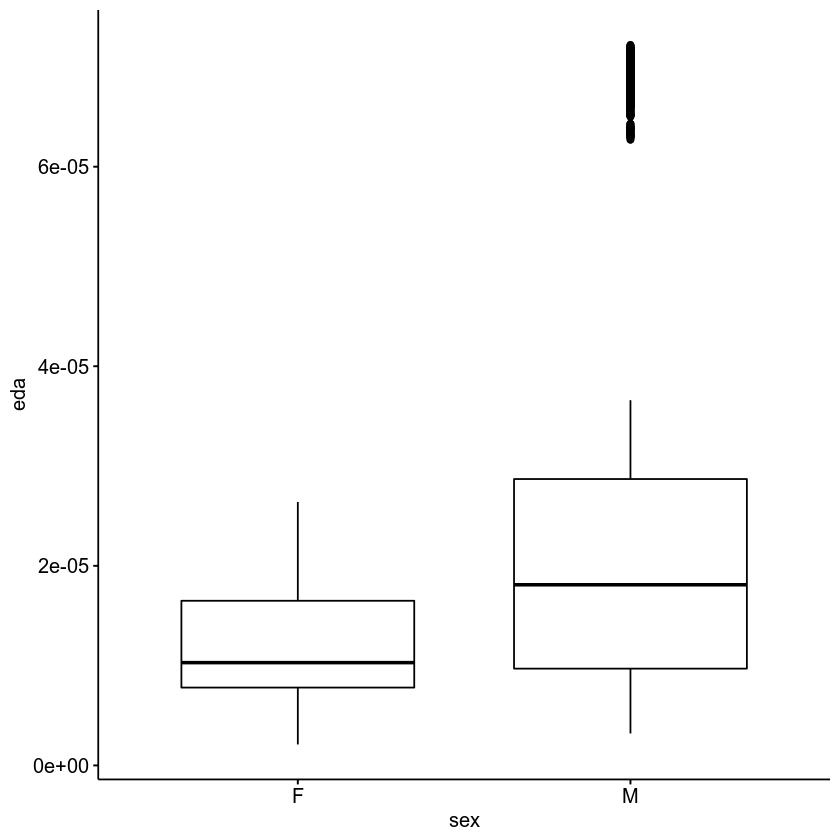

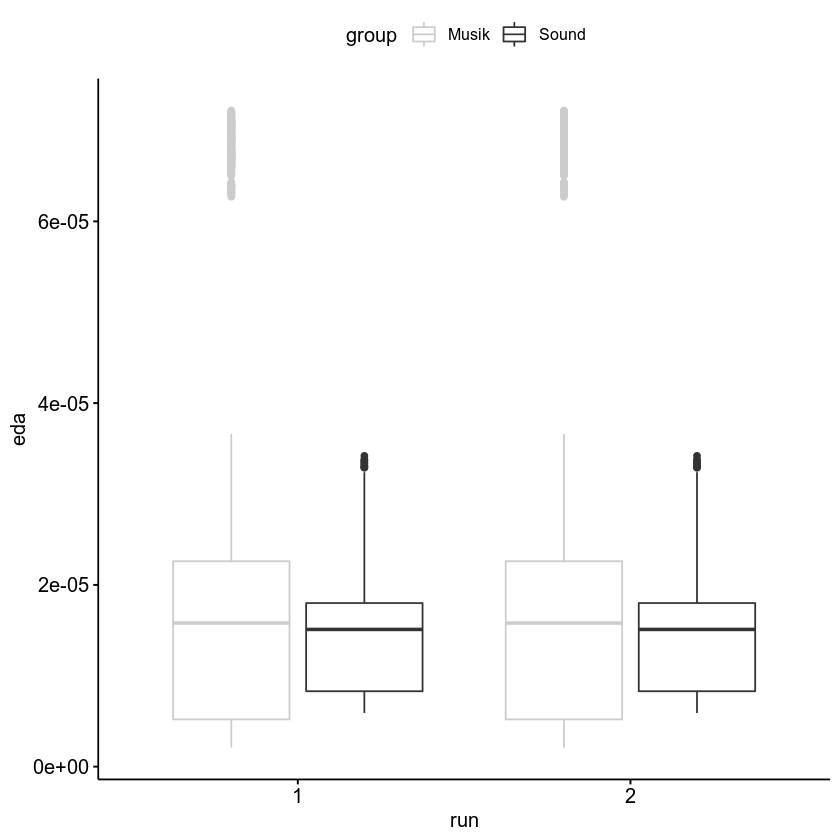

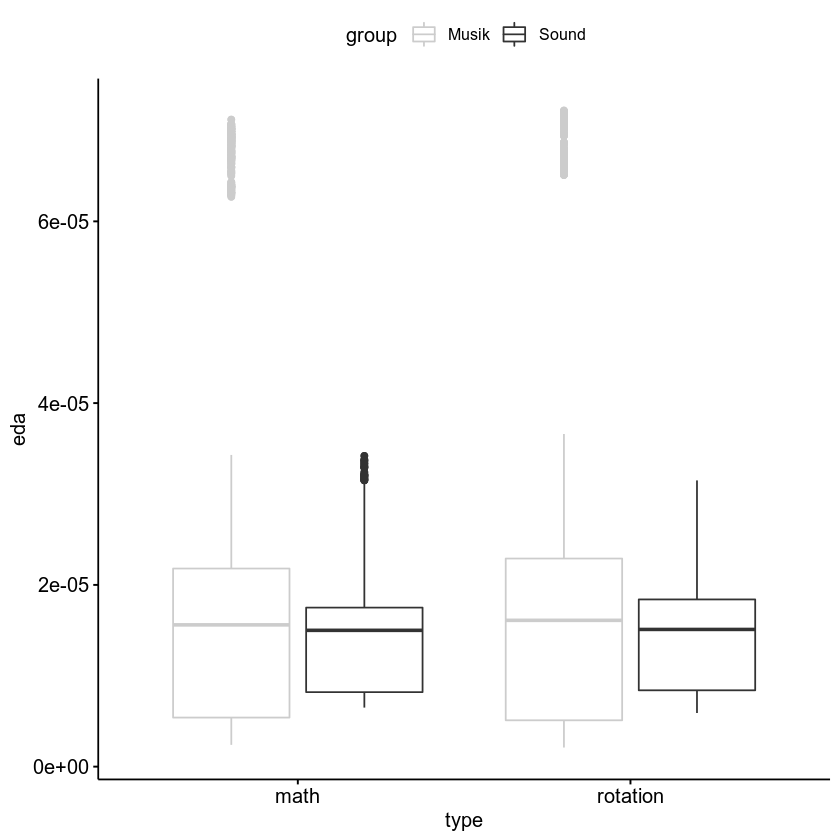

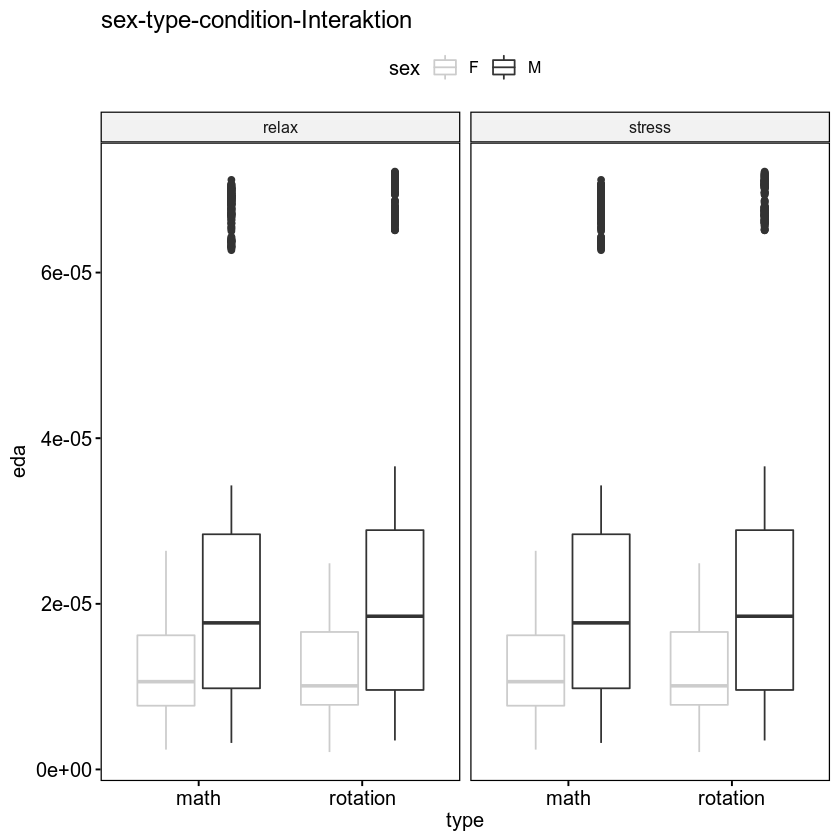

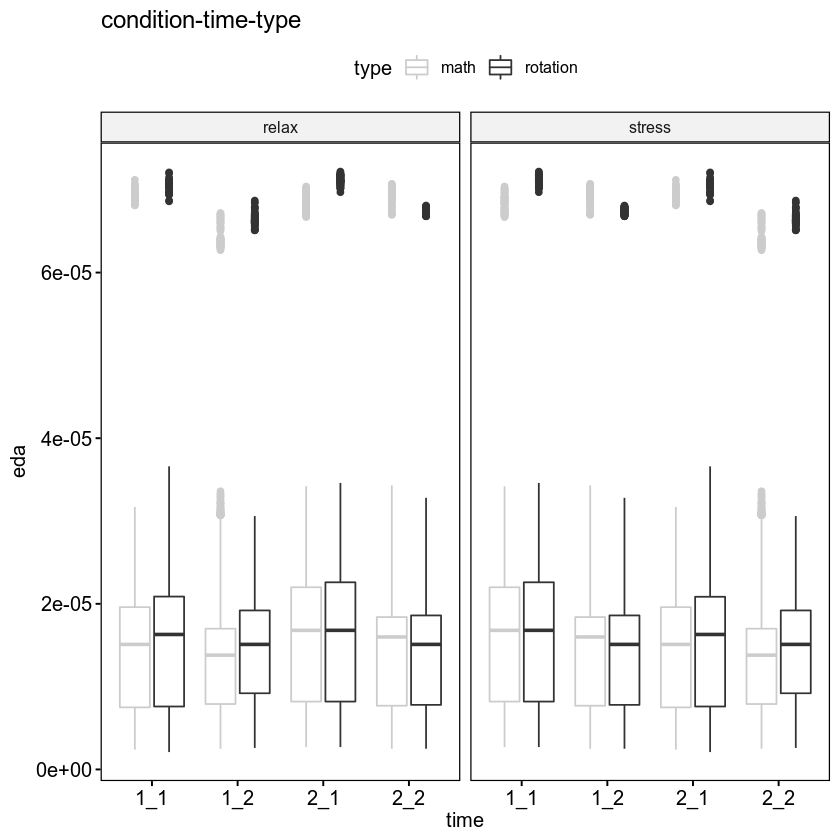

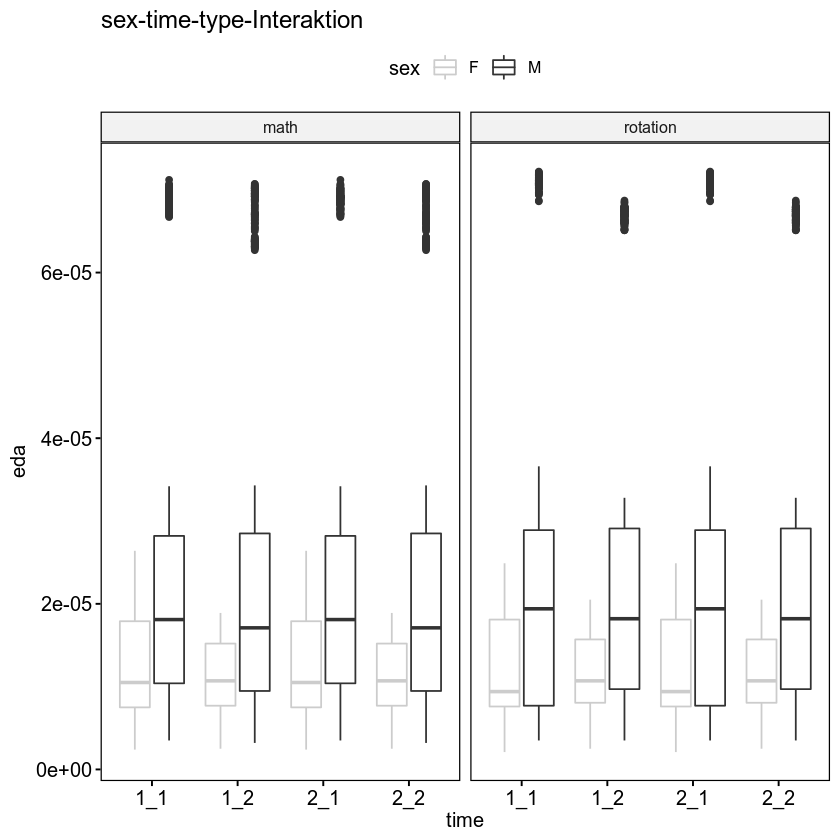

In [275]:
p_groupxtime <- ggboxplot(
  d_long_new, x = "time", y = "eda",
  color = "group", palette = "grey"
)
p_groupxtime

p_groupxtime1 <- ggboxplot(
  d_long_new, x = "time", y = "eda",
  color = "condition", palette = "grey"
)
p_groupxtime1
  
  
p_groupxtime2 <- ggboxplot(
  d_long_new, x = "condition", y = "eda",
  palette = "grey"
)
p_groupxtime2

  
p_groupxtime3 <- ggboxplot(
  d_long_new, x = "time", y = "eda",
  palette = "grey"
)
p_groupxtime3


p_groupxtime4 <- ggboxplot(
  d_long_new, x = "sex", y = "eda",
  palette = "grey"
)
p_groupxtime4

p_groupxtime5 <- ggboxplot(
  d_long_new, x = "run", y = "eda",
  color = "group", palette = "grey"
)
p_groupxtime5

p_groupxtype8 <- ggboxplot(
  d_long_new, x = "type", y = "eda",
  color = "group", palette = "grey"
)
p_groupxtype8 


p_timextype6 <- ggboxplot(
  d_long_new, x = "type", y = "eda", facet.by = "condition",
  color = "sex", palette = "grey", title = "sex-type-condition-Interaktion",
)
p_timextype6

p_timextype7 <- ggboxplot(
  d_long_new, x = "time", y = "eda", facet.by = "condition",
  color = "type", palette = "grey", title = "condition-time-type",
)
p_timextype7

p_timextype8 <- ggboxplot(
  d_long_new, x = "time", y = "eda", facet.by = "type",
  color = "sex", palette = "grey", title = "sex-time-type-Interaktion",
)
p_timextype8




In [282]:
# PNG device
png("plot1.png")

# Code
plot(p_groupxtime)

# Close device
dev.off()

png("plot2.png")
plot(p_groupxtime1)
dev.off()

png("plot3.png")
plot(p_groupxtime2)
dev.off()

png("plot4.png")
plot(p_groupxtime3)
dev.off()

png("plot5.png")
plot(p_groupxtime4)
dev.off()

png("plot6.png")
plot(p_groupxtime5)
dev.off()

png("plot7.png")
plot(p_groupxtype8)
dev.off()

png("plot8.png")
plot(p_timextype6)
dev.off()

png("plot9.png")
plot(p_timextype7)
dev.off()

png("plot10.png")
plot(p_timextype8)
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2